# Introductory analysis of data analyst job postings on Glassdoor

## 1. Introduction

This dataset was created by user picklesueat and it contains details on ~2,200 data analyst job postings from Glassdoor. This notebook will perform some preliminary analysis on the relationship between salary and various factors, such as location, industry, etc., to determine what are the most important factors to earn a higher salary as a data analyst.

## 2. Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
jobs=pd.read_csv("da_job_postings.csv")
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [2]:
jobs.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


### 2.1 Removing column

The first thing we can see it that there is an "Unnamed: 0" column that isn't needed, so we can go ahead and remove that for the sake of clarity. 

In [3]:
jobs.drop(["Unnamed: 0"], axis=1, inplace=True)

### 2.2 Removing bad values

After some more exploration, we can see that there are a lot of -1 values in the dataset, and in columns that we might need to do analysis on, e.g. rating or sector, as shown below. These might skew the analysis of the data.

In [4]:
print(jobs["Rating"].value_counts())
print(jobs["Sector"].value_counts())

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 1.0     10
 2.4     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.7      2
 1.8      2
 1.6      2
 1.9      2
Name: Rating, dtype: int64
Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals

Thus, we need to remove these -1 values, which probably just indicate no data in that field.

In [5]:
jobs=jobs.replace(-1,np.nan)
jobs=jobs.replace(-1.0,np.nan)
jobs=jobs.replace("-1",np.nan)
jobs=jobs.replace("-1.0",np.nan)

### 2.3 Transforming salary

Now that we have cleaned our data, we can work on transforming some of our columns to make them easier to work with. The first one to tackle will be salary, since it will form the basis of our analysis.

In [6]:
jobs.loc[:,"Salary Estimate"].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$42K-$63K (Glassdoor est.)     4
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: Salary Estimate, Length: 89, dtype: int64

We can compute an average salary as it is currently in the form of a range which is difficult to work with.

In [29]:
jobs.loc[:,"Minimum salary"]=jobs.loc[:,"Salary Estimate"].str.split().str[0].str.split(pat="-", expand=True).loc[:,0].str.strip("$").str.strip("K").astype(float)
jobs.loc[:,"Maximum salary"]=jobs.loc[:,"Salary Estimate"].str.split().str[0].str.split(pat="-", expand=True).loc[:,1].str.strip("$").str.strip("K").astype(float)
jobs.loc[:,"Average salary"]=(jobs.loc[:,"Minimum salary"]+jobs.loc[:,"Maximum salary"])/2
jobs.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimum salary,Maximum salary,Average salary,Seniority
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,TRUE,37.0,66.0,51.5,2.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37.0,66.0,51.5,2.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37.0,66.0,51.5,3.0


## 3. Salary by sector

Next, we can move on to the actual analysis. The first thing we want to consider the relationship between salary and the other variables available in the dataset. One of the most common considerations for prospective job seekers is what industry they should work in. We can attempt to answer this question using our dataset.

To analyze this problem, we will calculate average salary by sector. Industry is another option here but it is unnecessarily specific for our uses here, and will lead to many industry categories with minimal job postings. 

Additionally, we also show the number of postings to caution against smaller samples. In smaller samples we might see skew in distribution in other determining factors, such as role seniority, which might affect the average salary being computed. A sample size metric is also calculated for the purpose of representing sample size as bar height in the graph. Any sample size exceeding 50 is deemed to be large enough in this case.

In [8]:
salary_sector_df_average_salary=jobs.groupby("Sector").mean().loc[:,"Average salary"]
salary_sector_df_no_postings=jobs["Sector"].value_counts()
salary_sector={"Average salary":salary_sector_df_average_salary, "No. postings":salary_sector_df_no_postings, "Sample size":0}
salary_sector_df=pd.DataFrame(data=salary_sector)
salary_sector_df=salary_sector_df.sort_values("Average salary")
salary_sector_df["Sample size"]=salary_sector_df["No. postings"]/50
salary_sector_df.loc[salary_sector_df["No. postings"]>=40, "Sample size"]=0.8
salary_sector_df

,Average salary,No. postings,Sample size
"Restaurants, Bars & Food Services",54.000000,8,0.16
Mining & Metals,59.500000,1,0.02
Travel & Tourism,62.000000,1,0.02
"Oil, Gas, Energy & Utilities",63.269231,13,0.26
Government,64.319444,36,0.72
Non-Profit,65.769231,26,0.52
Retail,66.684211,38,0.76
Finance,67.644970,169,0.80
Media,68.476190,42,0.80
Aerospace & Defense,68.500000,22,0.44


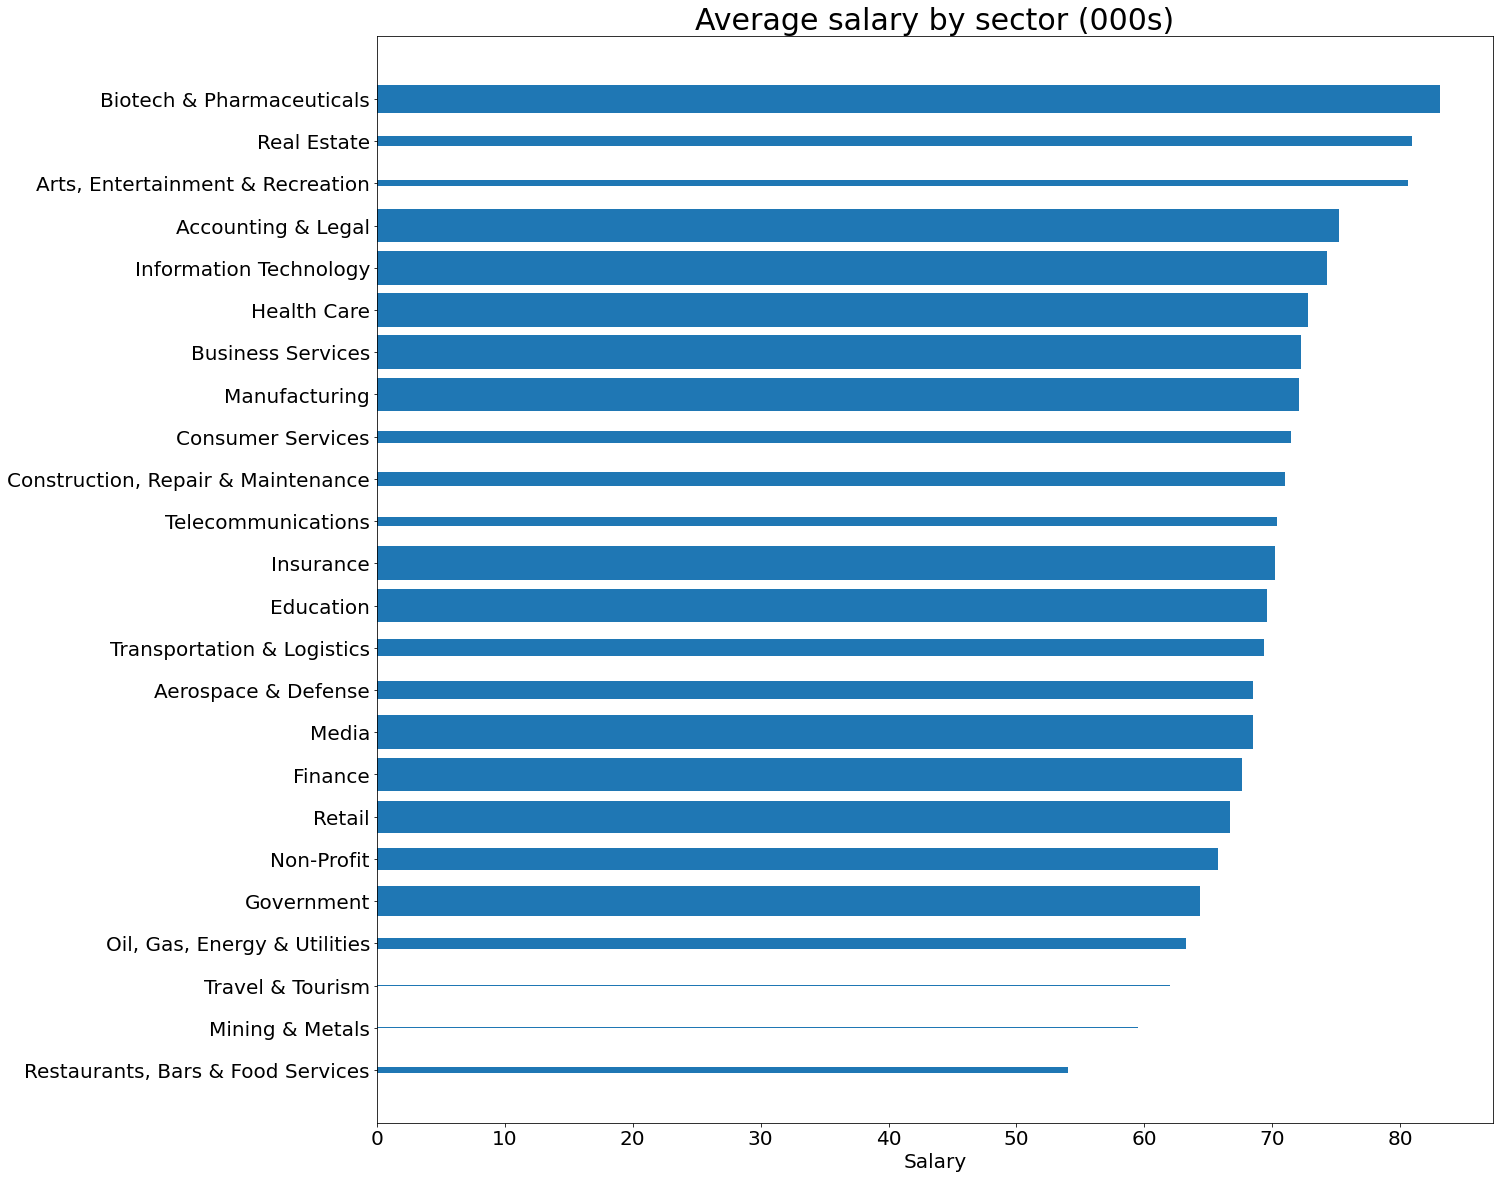

In [9]:
plt.figure(figsize=(20,20))
plt.barh(salary_sector_df.index, salary_sector_df.loc[:,"Average salary"], height=salary_sector_df.loc[:,"Sample size"])
plt.title("Average salary by sector (000s)", fontsize=30)
plt.xlabel("Salary", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

From this graph, we can see that biotech and pharmaceutical is the most lucrative sector to be in, with an average salary of 83.1K on a sample of 33 job postings. The next two are real estate and arts, and entertainment & recreation, though these two have very small sample sizes of 7 and 12, respectively. These two data points also conflict with common knowledge as neither are known as particularly lucrative industries, at least for data analytics. Other industries with higher salaries and a more robust sample size include accounting & legal and information technology.

It should be noted that most industries fall within a fairly tight range of $65K-75K, so the variance is not extremely high. Thus, if the variance is not a deal breaker to job seekers, then they may look to other factors, such as work-life balance, personal interests, etc.

## 4. Seniority

Another interesting area to explore is seniority and how salary varies by seniority. Prospective job seekers are often interested in how much they can earn at their current experience level or at they experience level that they would like to be hired at.

First, we should explore the "Job Title" column to see what kind of results exist in the dataset.

In [10]:
jobs["Job Title"].value_counts().head(50)

Data Analyst                                                                        405
Senior Data Analyst                                                                  90
Junior Data Analyst                                                                  30
Business Data Analyst                                                                28
Sr. Data Analyst                                                                     21
Data Analyst Junior                                                                  17
Data Analyst II                                                                      17
Data Quality Analyst                                                                 17
Data Governance Analyst                                                              16
Lead Data Analyst                                                                    15
Data Reporting Analyst                                                               13
Financial Data Analyst          

We can see that there is a wide variety of experience levels in the dataset. To be able to calculate salary by experience level, we need a way to segment the dataset by experience level. Python can search for certain keywords in each row, so we use some commonly seen/known keywords in job titles to help segment the dataset. Three levels of seniority seems most appropriate: junior, intermediate, and senior. Although we might add a fourth level (management), there seems to be a minimal number of manager postings in the dataset, so we can ignore that. To make calculations simpler, we will assign a numeric value to each seniority level rather than using a string, with 1 denoting junior positions, and with the number increasing with seniority. Any postings not junior or senior are considered to be intermediate, as the most common job titles are for roles like "Data Analyst" or "Business Analyst", which should generally be for intermediate levels of experience.

In [11]:
jobs.loc[jobs.loc[:,"Job Title"].str.contains("Senior|Sr.|Sr|Lead|Master|Manager| III | IV ", case=False, regex=True), "Seniority"]=3
jobs.loc[jobs.loc[:,"Job Title"].str.contains("Junior|Jr.|Jr|Entry|Intern| I ", case=False, regex=True), "Seniority"]=1
jobs.loc[jobs.loc[:,"Seniority"].isnull(), "Seniority"]=2

Now, we can calculate average salary by seniority.

In [33]:
jobs_seniority=jobs.groupby("Seniority").mean().loc[:,"Average salary"]
print(jobs_seniority)
print(jobs["Seniority"].value_counts())

Seniority
1.0    67.295238
2.0    71.376856
3.0    75.348399
Name: Average salary, dtype: float64
2.0    1617
3.0     531
1.0     105
Name: Seniority, dtype: int64


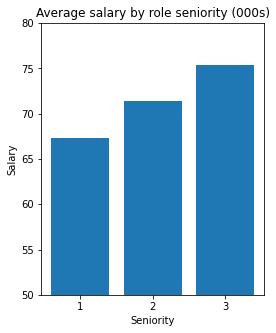

In [13]:
plt.figure(figsize=(4,5))
plt.bar(jobs_seniority.index, jobs_seniority.values)
plt.title("Average salary by role seniority (000s)")
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.xticks(jobs_seniority.index)
plt.ylim([50,80])
plt.show()

From this analysis, we can see that although there is an obvious increase in average salary by experience level, the jumps in each role are far less than what might seem reasonable or realistic, with the difference between each level being ~$4k. We can investigate this finding in more detail by plotting each data point by seniority level in a scatter graph.

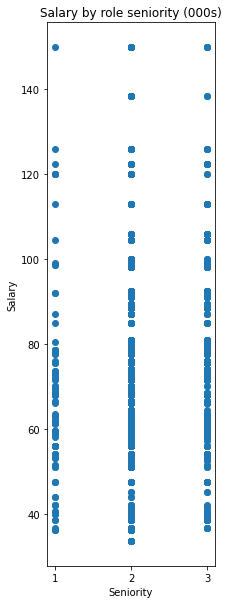

In [31]:
plt.figure(figsize=(3,10))
plt.scatter(jobs["Seniority"], jobs["Average salary"])
plt.title("Salary by role seniority (000s)")
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.xticks(jobs_seniority.index)
plt.show()

In [15]:
jobs["Seniority"].corr(jobs["Average salary"])

0.08411097286316542

We can see from the scatter graph that the distribution of salaries is highly variable in each seniority level. In fact, the range and distribution (right-skewed) seems largely the same in each seniority level. The correlation between seniority and salary seems very low as well.

There are a few probable explanation for this:
- Postings within experience levels might be skewed in other predictive factors, such as more senior jobs postings in low cost of living areas, or in less lucrative industries.
- Data quality issues with Glassdoor since salary ranges are based on user expectation, and wide ranges due to improper collation of data might affect accuracy analysis.
- Inadequate segementation of seniority levels. The intermediate category (2 in the graph) in particular has a much larger sample size than the other two categories because it takes all jobs postings that do not explicitly have "senior" or "junior" in their job title. The result is that there are probably a material number of postings that are labeled "Data Analyst" or something similar to actually have expectations for a more or less years of experience.

Although the third explanation is the most likely, realistically all three (among other points) are affecting the dataset.

## 5. Conclusion

We have investigated the relationship between salary and two other variables: sector and experience level. In the case of sector, there were clearly sectors that were more lucrative than others, such as biotech, pharmaceuticals, and IT. However, most other sectors fell within a fairly tight range of ~10k In the case of experience level, although average salary went up by the experience level required (as expected), the jumps were very small at ~4k per level and there was significant variance in salary within each seniority level. This leads us to believe that although being more experienced will certainly lead to higher salaries, other factors may be more predictive of absolute salary.

Next steps would include diving deeper into other interesting factors, such as skillsets or cities (and cost of living). We could also perform a regression analysis to see which factors are most predictive of salaries.